In [3]:

import matplotlib.pyplot as plt
import pandas as pd
from shotcharts.histogram_3d import Histogram3D
from shotcharts.heatmap import Heatmap
from geometry.court_3d import draw_3d_halfcourt
from customization.team_colors import TeamColors


df = pd.read_csv('NBA_2024_Shots.csv')


In [6]:
display_team = "Boston Celtics"

## 3D Histogram

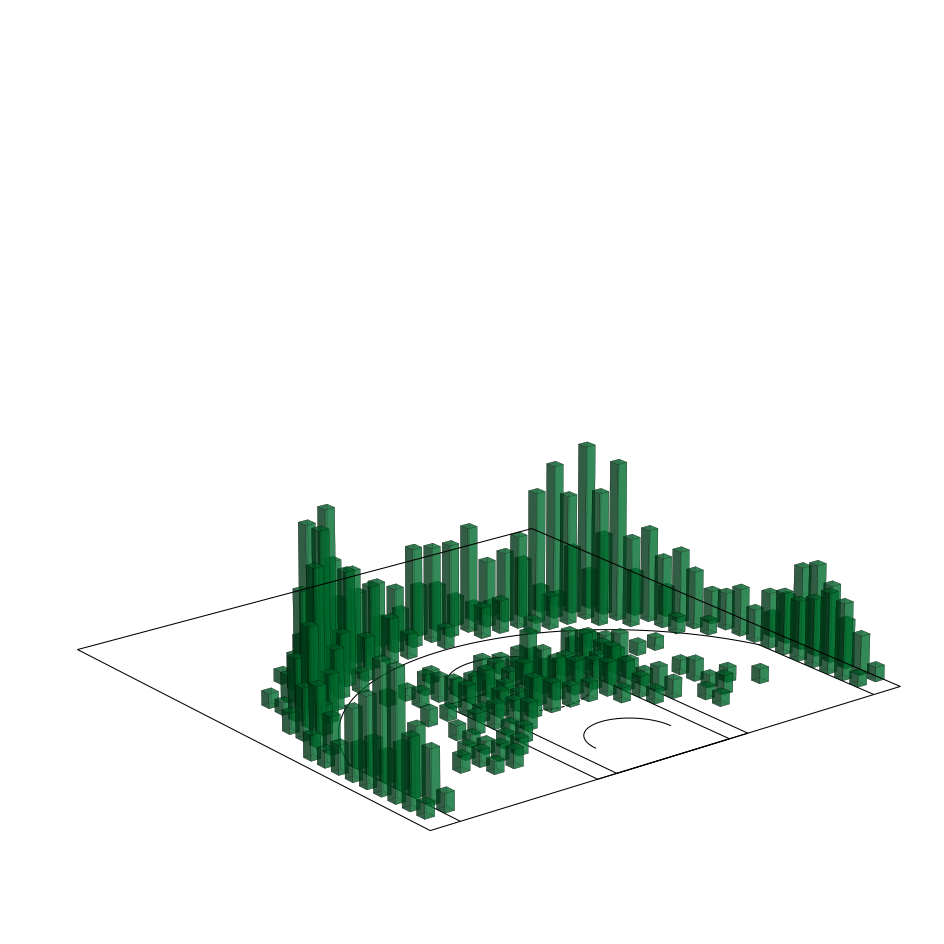

In [7]:


team_hex = TeamColors(team=display_team).colors[0]["HEX"]

# instantiate figure object
hist3d = Histogram3D(threshold=5)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# filter data
df_team = df[df['TEAM_NAME'] == display_team]
df_filtered = df_team[(df_team['ZONE_RANGE'] != 'Less Than 8 ft.') & (df_team['ZONE_RANGE'] != 'Back Court Shot')]
x, y = 10*df_filtered['LOC_X'], 10*df_filtered['LOC_Y']-47.5 # convert feet to inches

# draw plot
hist3d.plot(x, y, ax=ax, color=team_hex, edgecolor='black', alpha=0.55, linewidth=0.1)
draw_3d_halfcourt(ax, lw=0.75)
ax.set_zlim(0, 200)

# axes off
ax.view_init(azim=52, elev=19)
# ax.axis('off')
# fig.subplots_adjust(left=0, right=1, bottom=0, top=0.4)

# axis off
ax.axis('off')

plt.show()


## 2D HEATMAP

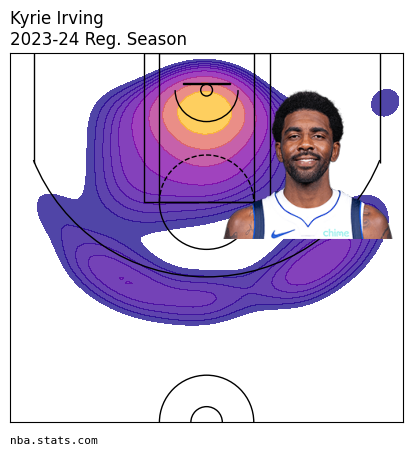

In [4]:
hm = Heatmap(headshot=True)

# filter data
dfp = df[df['PLAYER_NAME'] == "Kyrie Irving"]
nba_id = dfp['PLAYER_ID'].values[0]
x, y = 10*dfp['LOC_X'], 10*dfp['LOC_Y']-47.5 # convert feet to inches
hm.plot(x, y, title="Kyrie Irving\n2023-24 Reg. Season", footnote="nba.stats.com", nba_id=nba_id)

## 2D Histogram

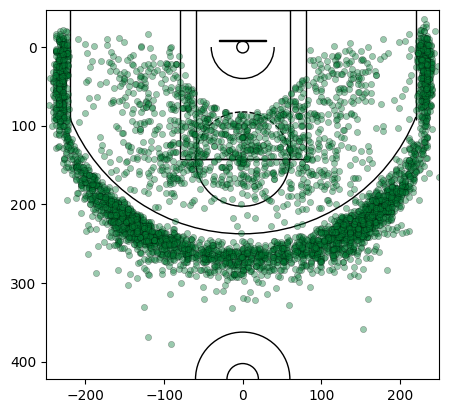

In [4]:
from geometry.court_2d import draw_halfcourt
fig = plt.figure()
ax = fig.add_subplot()
draw_halfcourt(ax)

# plot the shots
ax.scatter(x, y, color=team_hex, s=20, alpha=0.4, edgecolors='black', linewidth=0.35)
plt.show()
